# Practice 2

In [273]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [274]:
np.random.seed(42)

## Step 1

In [275]:
mean        = 0
std         = 1
n_sample    = 500

samples = np.random.normal(mean, std, n_sample)

Text(0.5, 1.0, 'Histogram of Samples')

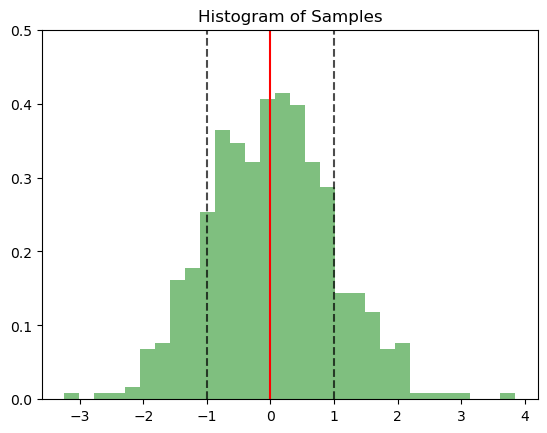

In [276]:
plt.hist(samples, bins=30, density=True, alpha=0.5, color='g', label='Samples')
plt.plot([mean, mean], [0, 1], color='r')
plt.plot([mean+std, mean+std], [0, 1], color='k', alpha=0.7, linestyle='--')
plt.plot([mean-std, mean-std], [0, 1], color='k', alpha=0.7, linestyle='--')

plt.ylim(0, .5)

plt.title('Histogram of Samples')

## Step 2

In [277]:
chisq = (samples - np.mean(samples)) ** 2 / np.std(samples)**2

## Step 3

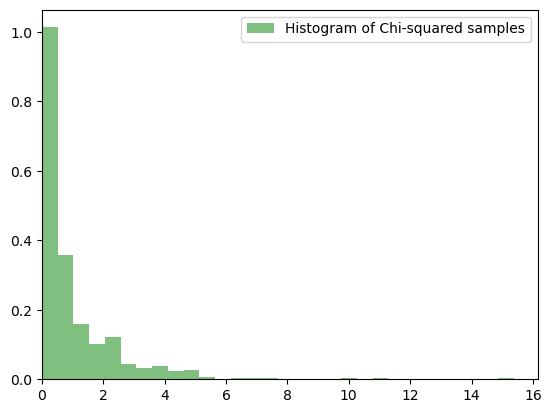

In [278]:
plt.hist(chisq, bins=30, density=True, alpha=0.5, color='g', label='Histogram of Chi-squared samples')
plt.xlim(left=0)
plt.legend()
plt.show()

## Step 4

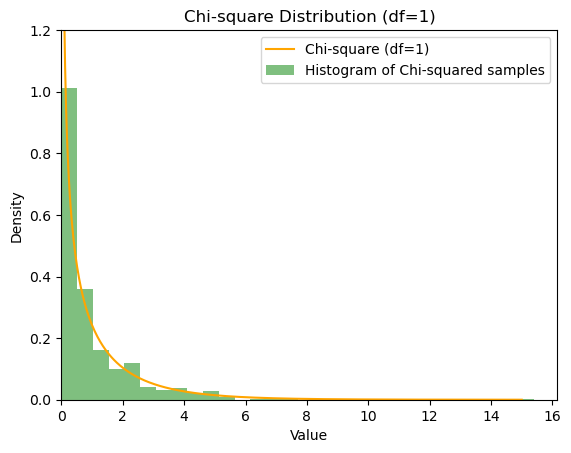

In [279]:
from scipy.stats import chi2

x = np.linspace(0, 15, n_sample)
pdf = chi2.pdf(x, df=1)

plt.plot(x, pdf, label='Chi-square (df=1)', color='orange')
plt.hist(chisq, bins=30, density=True, alpha=0.5, color='g', label='Histogram of Chi-squared samples')
plt.legend()
plt.title('Chi-square Distribution (df=1)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.ylim(0, 1.2)
plt.xlim(left=0)

plt.show()

## Step 5

In [280]:
n_set = 10
samples = np.random.normal(mean, std, (n_set, n_sample))

chisq_array = []
for i in range(n_set):
    chisq = (samples[i] - np.mean(samples[i])) ** 2 / np.std(samples[i])**2
    chisq_array.append(chisq)

chisq_array = np.sum(chisq_array, axis=0)

(500,)


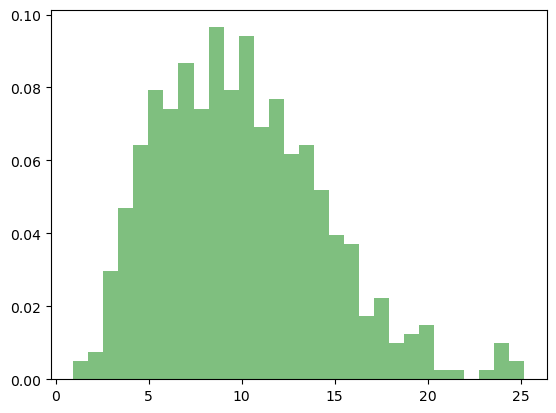

In [281]:
plt.hist(chisq_array, bins=30, density=True, alpha=0.5, color='g', label='Histogram of Chi-squared samples')
plt.show()